# Surface States

## Calculation of band structure

This time we will try to calculate the band structure and identify surface states. To do this, we take into account the `Off-axis propagation` notebook:

In [1]:
import meep as mp
from meep import mpb
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

resolution = 128 

a = 1 # arbitrary units
w1 = 0.2 * a
w2 = 0.8 * a # For the Quarter Wave Stack: w2 = a - w1

Med_1 = mp.Medium(index=np.sqrt(13))
Med_2= mp.Medium(index=1)

sc_z = 1 * a  # supercell width

geometry_lattice = mp.Lattice(size=mp.Vector3(0,0,sc_z))

center1 = 0.5*(-sc_z + w1)
center2 = 0.5*(sc_z - w2)
geometry = [mp.Block(size=mp.Vector3(mp.inf, mp.inf, w1),
                     center=mp.Vector3(0,0,center1), material=Med_1),mp.Block(size=mp.Vector3(mp.inf, mp.inf, w2),
                     center=mp.Vector3(0,0,center2), material=Med_2)]

num_bands = 10

num_k = 40
k_minz = -0.5
k_maxz = 0.0
k_miny = 0.0
k_maxy = 1.5

k_pointsz = mp.interpolate(num_k, [mp.Vector3(0,0,k_minz), mp.Vector3(0,0,k_maxz)])
k_pointsy = mp.interpolate(num_k, [mp.Vector3(0,k_miny,k_maxz), mp.Vector3(0,k_maxy,k_maxz)])
k_points = k_pointsz + k_pointsy

ms = mpb.ModeSolver(geometry_lattice=geometry_lattice,
                    geometry=geometry,
                    k_points=k_points,
                    resolution=resolution,
                    num_bands=num_bands)
ms.run()

Initializing eigensolver data
Computing 10 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 1 x 1 x 128.
Solving for 10 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0,0,-0.4)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,0.1)
          size (1e+20,1e+20,0.8)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 2 and 5 object nodes (vs. 2 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: .
Initializing fields to random numbers...
84 k-points
  Vector3<0.0, 0.0, -0.5>
  Vector3<0.0, 0.0, -0.4878048780487805>
  Vector3<0.0, 0.0, -0.47560975609756095>
  Vector3<0.0, 0.0, -0.46341463414634143>
  Vector3<0.0, 0.0, -0.45121951219512196>
  V

Now, we have passed everything down to `sf_ms.py` and run. We then generate some **band files** to plot them later. This was done by means of the `grep` command, i.e.: `grep freqs: sf_data.dat > sf_bands.dat`. To access the file:

In [2]:
import os
path = os.path.abspath(os.getcwd())
print(path)

/home/ben/Desktop/Thesis/github/Thesis_name/Simulations/01_Multilayer_Film/Surface_States


In [5]:
f0 = np.genfromtxt(path+"/data/sf_bands_0.dat", delimiter=",")[:-1,1:]
f1 = np.genfromtxt(path+"/data/sf_bands_1.dat", delimiter=",")[:-1,1:]

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


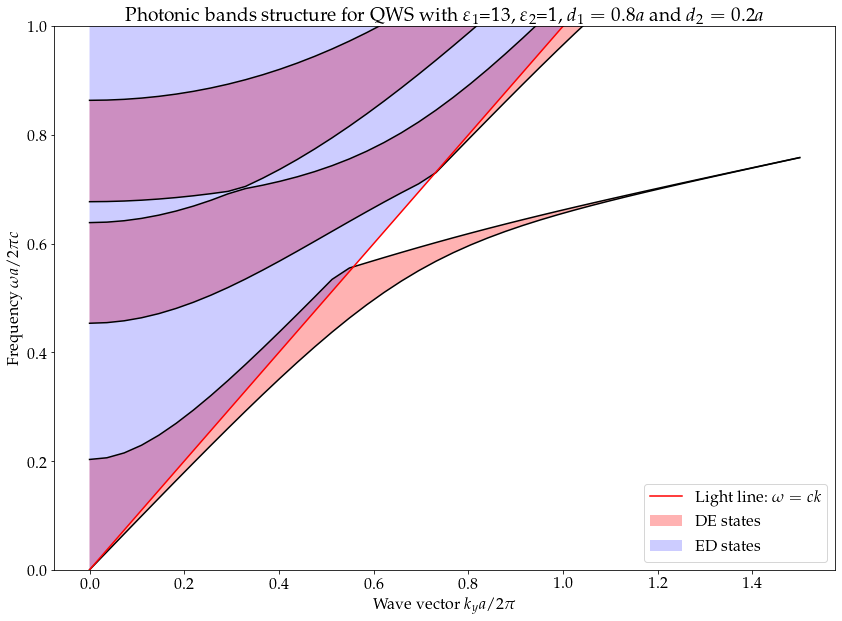

In [6]:
fig, ax = plt.subplots(figsize=(14,10))
title = "Photonic bands structure for QWS with $\\varepsilon_1$=13, $\\varepsilon_2$=1, $d_1=0.8a$ and $d_2=0.2a$"
ax.plot(f0[:,2], f0[:,-9], c='black') 
ax.plot(f1[:,2], f1[:,-9], c='black')
ax.fill_between(f0[:,2],f0[:,-9],f1[:,-9], facecolor='red', alpha=0.3, label='DE states')
ax.plot(f0[:,2], f0[:,-7], c='black') 
ax.plot(f1[:,2], f1[:,-7], c='black')
ax.fill_between(f0[:,2],f0[:,-7],f1[:,-7], facecolor='red', alpha=0.3)
ax.plot(f0[:,2], f0[:,-5], c='black') 
ax.plot(f1[:,2], f1[:,-5], c='black')
ax.fill_between(f0[:,2],f0[:,-5],f1[:,-5], facecolor='red', alpha=0.3)
ax.fill_between(f0[:,2],np.ones(len(f0[:,2])),f0[:,2], facecolor='blue', alpha=0.2, label='ED states')
ax.plot(f0[:,2], f0[:,2], c='r', label='Light line: $\omega = ck$')
ax.set_title(title)
ax.set_xlabel("Wave vector $k_y a / 2 \pi$")
ax.set_ylabel("Frequency $\omega a / 2 \pi c$")
ax.set_ylim(0,1)
ax.legend(loc=4)

The purple states are EE states, while we can have a DD state (surface wave) in the white region.

In the surface, we have an interface between two mediums (PC and air), where one has a band gap while the other has not.

Obviously, light is bound to to the surface if the frequency is below the light line. This is the case for **index guided modes** (generalization of total internal reflection, where the modes are localized close to the glass and the fileds are evanescent).

The ED states, are extended in air region and decay in the crystal region (the contrary for DE states). Where both overlap, we have states that extend in air and the crystal. For the white region, modes are evanescent in both sides of the crystal.